# Video Game Sales Exploratory Data Analysis

### Required Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the dataset

In [3]:
data = pd.read_csv('../Data/vgsales.csv', encoding='utf-8')

#### Basic Exploration 

In [4]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Summary Statistics

In [6]:
print("\nSummary Statistics for Numeric Columns:")
data.describe().drop("count").T



Summary Statistics for Numeric Columns:


,mean,std,min,25%,50%,75%,max
Rank,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


#### Check for missing values

In [7]:
print("\nMissing Values:")
data.isnull().sum()


Missing Values:


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

### Dropping rows that contain null values. Won't be able to use without a publisher.

In [8]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### A description of the cleaned data

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16291.0,8290.190228,4792.654450,1.00,4132.50,8292.00,12439.50,16600.00
Year,16291.0,2006.405561,5.832412,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16291.0,0.265647,0.822432,0.00,0.00,0.08,0.24,41.49
EU_Sales,16291.0,0.147731,0.509303,0.00,0.00,0.02,0.11,29.02
JP_Sales,16291.0,0.078833,0.311879,0.00,0.00,0.00,0.04,10.22
Other_Sales,16291.0,0.048426,0.190083,0.00,0.00,0.01,0.04,10.57
Global_Sales,16291.0,0.540910,1.567345,0.01,0.06,0.17,0.48,82.74


#### Categorical Column Distribution

In [10]:
print("\nCategorical Column Distribution:")
for column in data.select_dtypes(include='object'):
    print(f"\n{column}:\n{data[column].value_counts()}")


Categorical Column Distribution:

Name:
Name
Need for Speed: Most Wanted    12
FIFA 14                         9
Ratatouille                     9
LEGO Marvel Super Heroes        9
Cars                            8
                               ..
PGA Tour 96                     1
Game & Wario                    1
Angry Birds                     1
Shadow Hearts: Covenant         1
Know How 2                      1
Name: count, Length: 11325, dtype: int64

Platform:
Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

Genre:
Genre
Action          3251
Sports          2304
Misc            1686
Role-Playing 

#### Correlation Heatmap for numeric columns

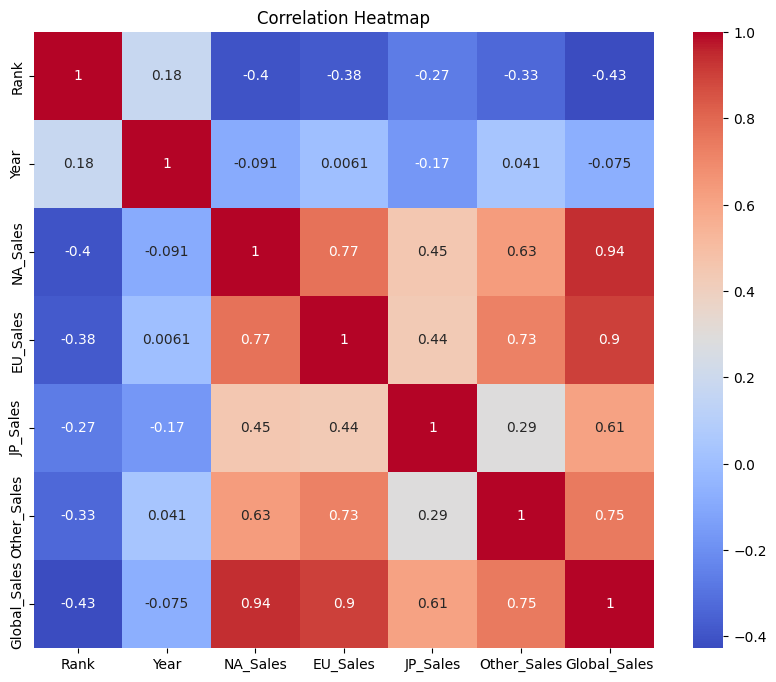

In [11]:
correlation_matrix = data.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#### Pairplot for numeric variables

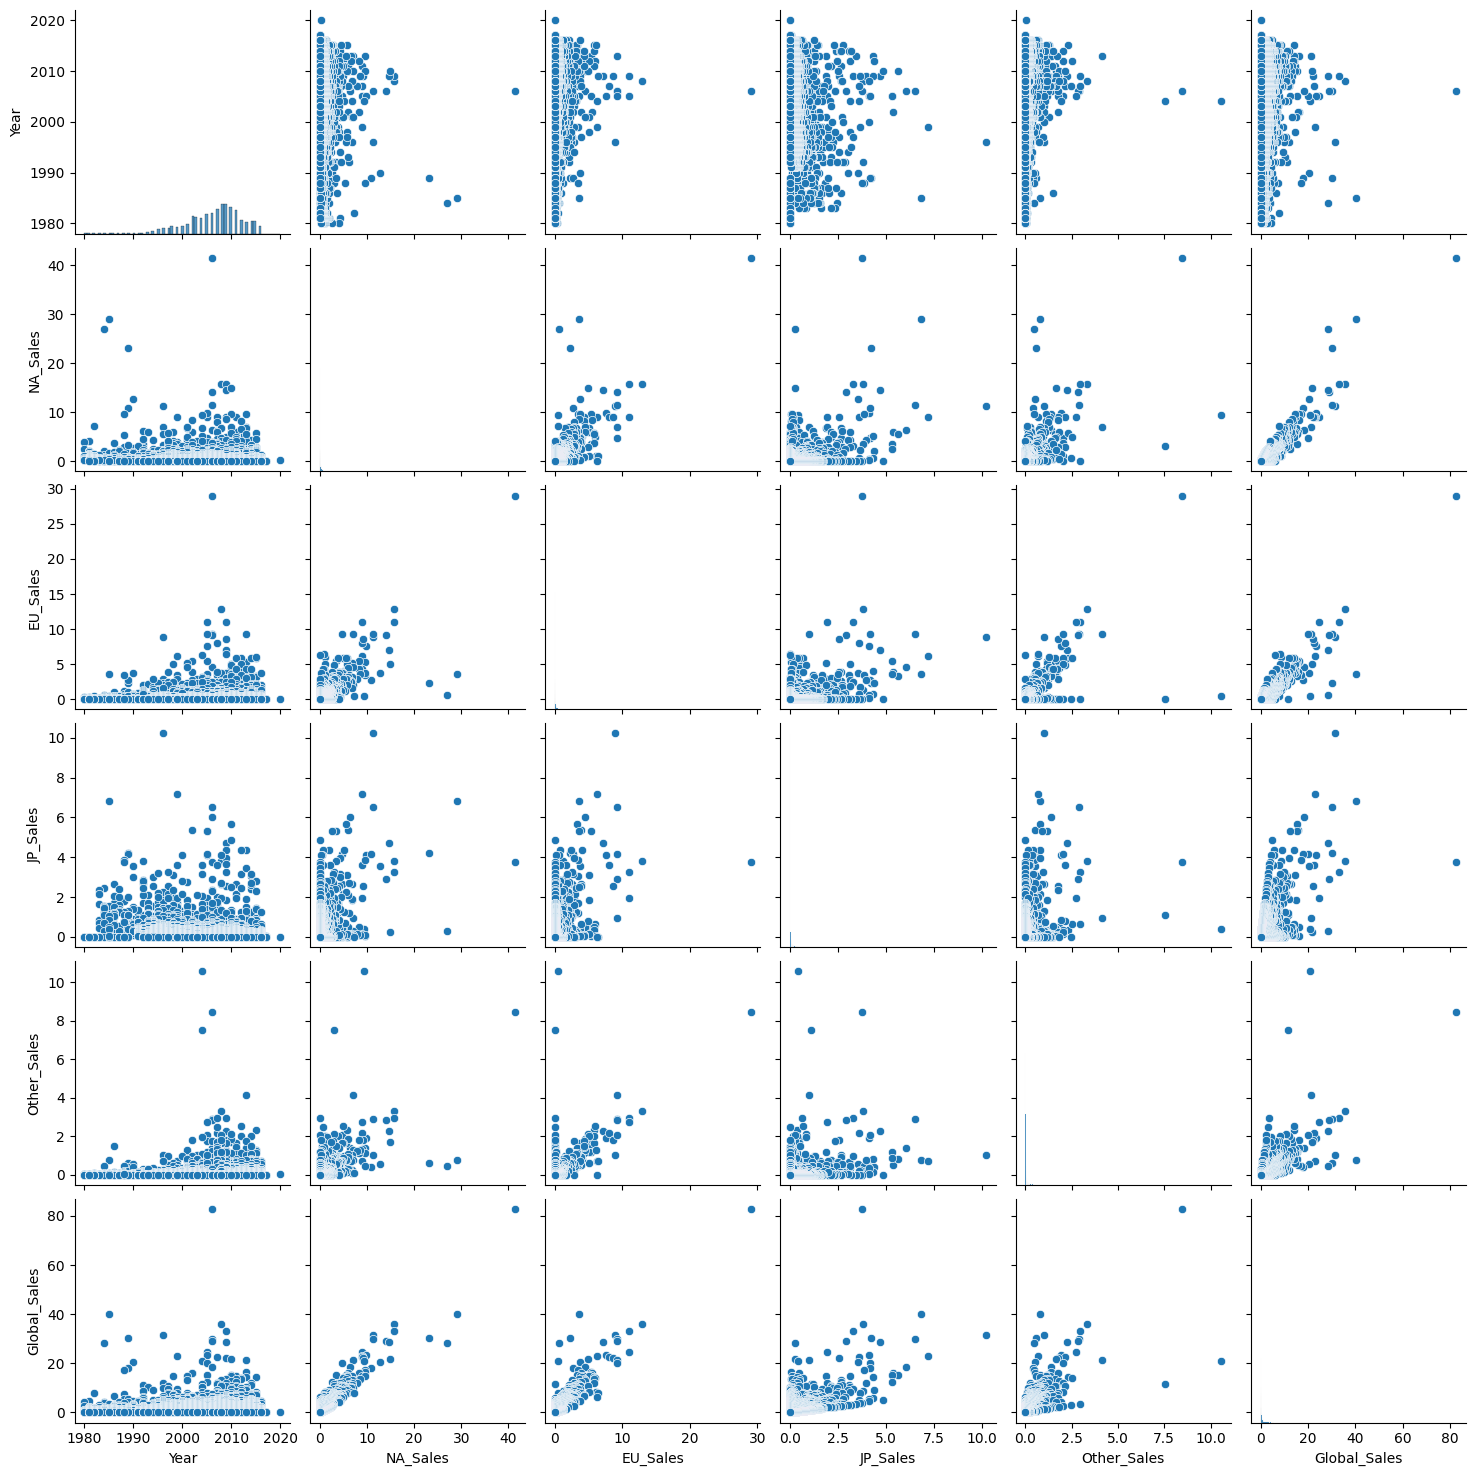

In [12]:
sns.pairplot(data.drop('Rank', axis=1).select_dtypes(include=[np.number]))


# The distribution of games across different platforms, genres, time, and publishers

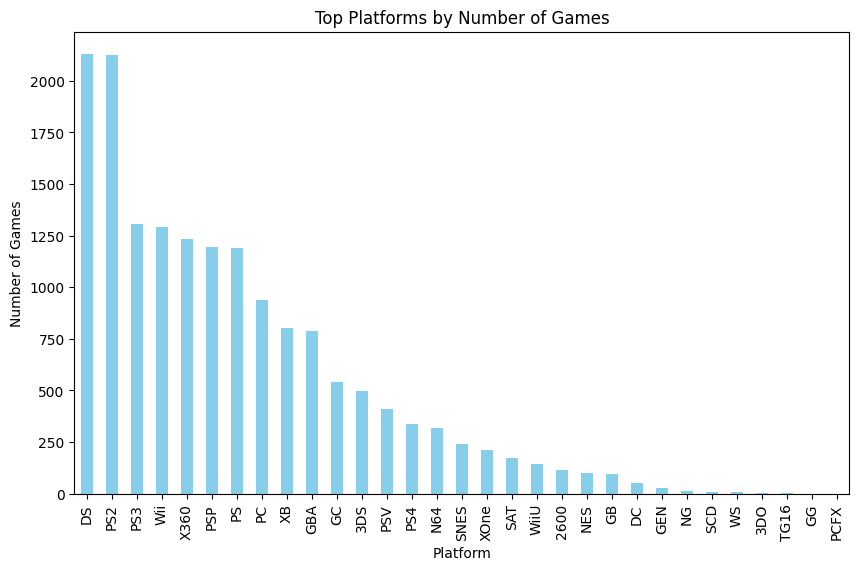

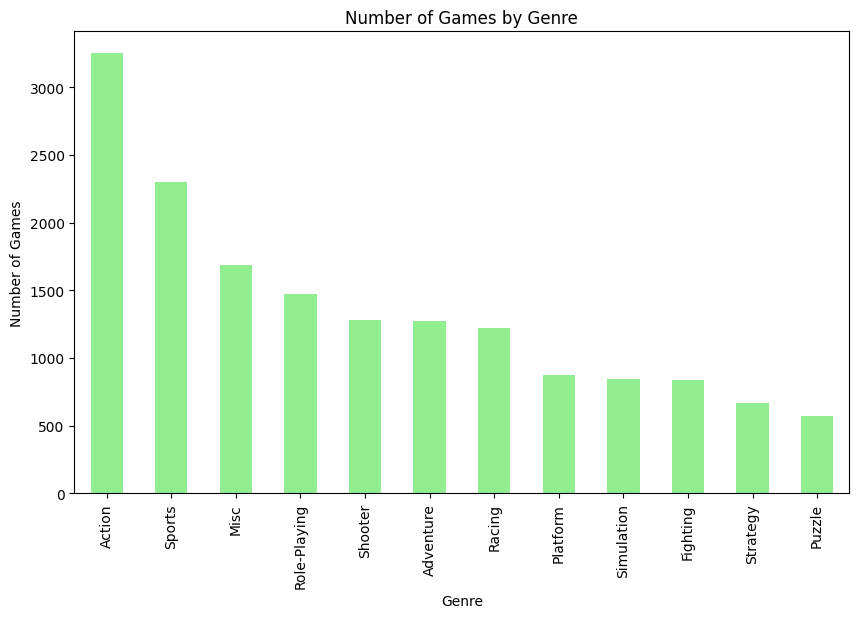

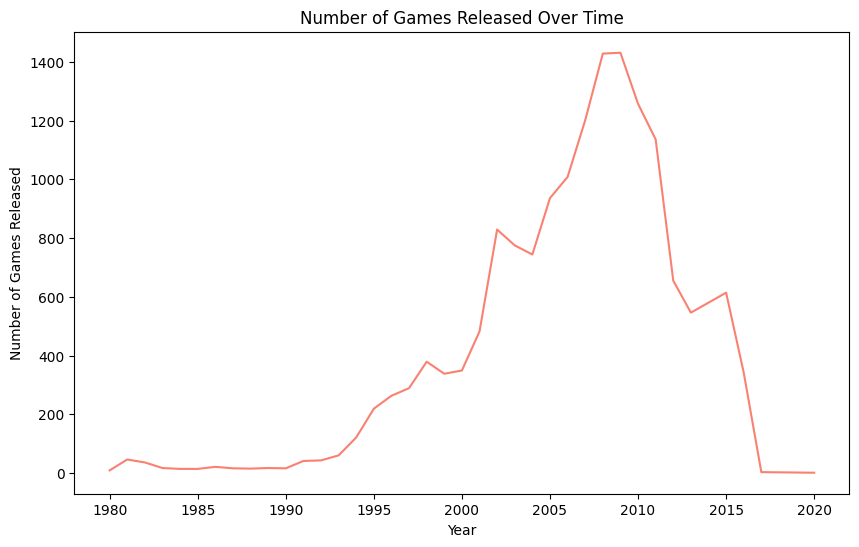

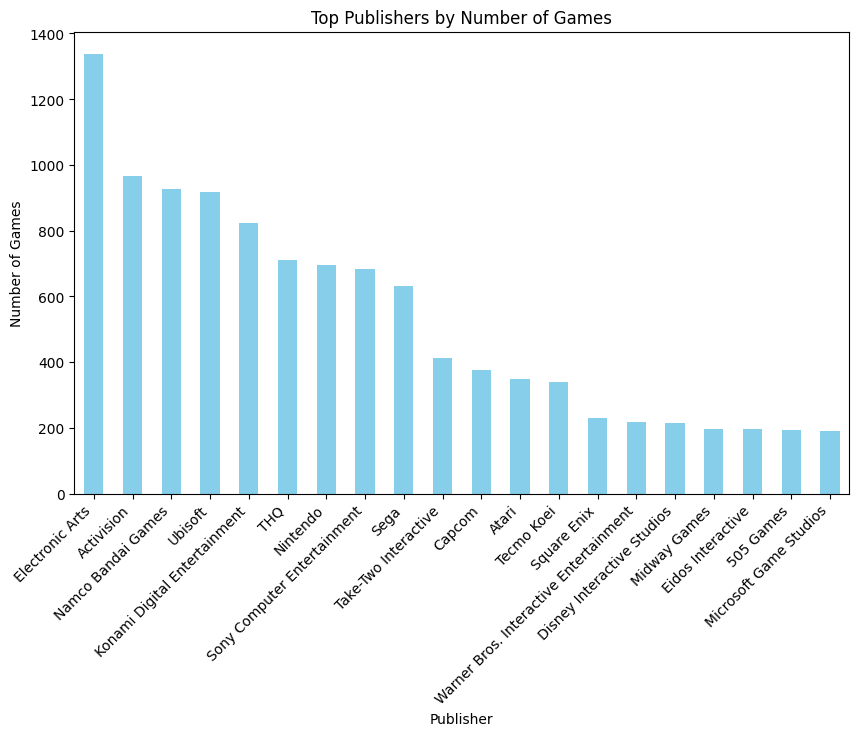

In [13]:

# Distribution of games by platform
platform_counts = data['Platform'].value_counts()

# Plotting top platforms
plt.figure(figsize=(10, 6))
platform_counts.plot(kind='bar', color='skyblue')
plt.title('Top Platforms by Number of Games')
plt.xlabel('Platform')
plt.ylabel('Number of Games')
plt.show()

# Distribution of games by genre
genre_counts = data['Genre'].value_counts()

# Plotting genres
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='lightgreen')
plt.title('Number of Games by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.show()

# Distribution of games by year
year_counts = data['Year'].value_counts().sort_index()

# Plotting year distribution
plt.figure(figsize=(10, 6))
year_counts.plot(color='salmon')
plt.title('Number of Games Released Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show()

# Distribution of games by publisher
title_counts = data['Publisher'].value_counts()

# Plotting top publishers
plt.figure(figsize=(10, 6))
title_counts.head(20).plot(kind='bar', color='skyblue')
plt.title('Top Publishers by Number of Games')
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.show()


__Distribution of Games by Platform:__

The dataset contains a wide variety of platforms. Some platforms have a significantly higher number of games compared to others, reflecting the popularity and longevity of certain gaming systems.

__Distribution of Games by Genre:__

Games are spread across various genres, with some genres having more entries than others. This distribution reflects the diverse preferences of gamers and the industry's response to these preferences.

__Distribution of games by time:__

The number of games released saw a significant spike from 2000 onward

__Distribution of games by publisher:__

There are a number of publishers with the top being well known publishers

# Sales analysis across different regions, genres, platforms, and publishers

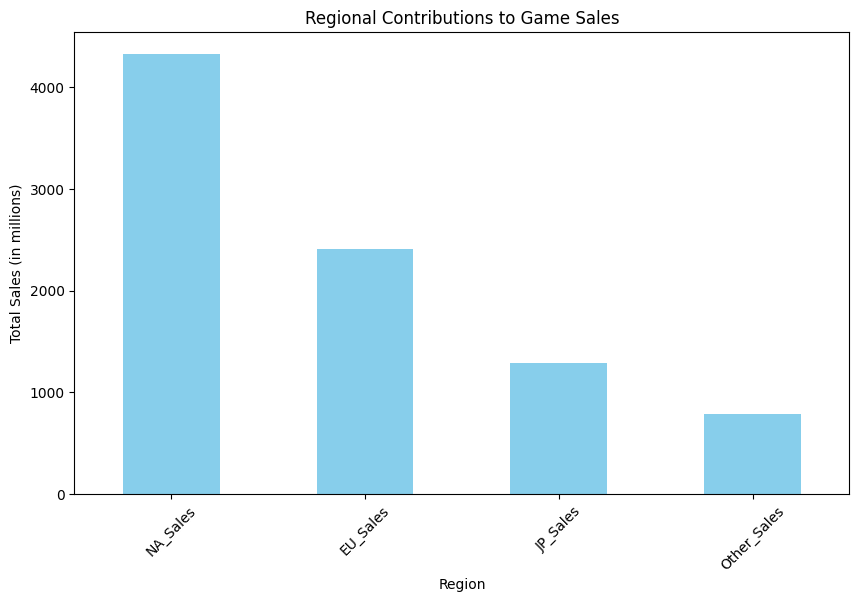

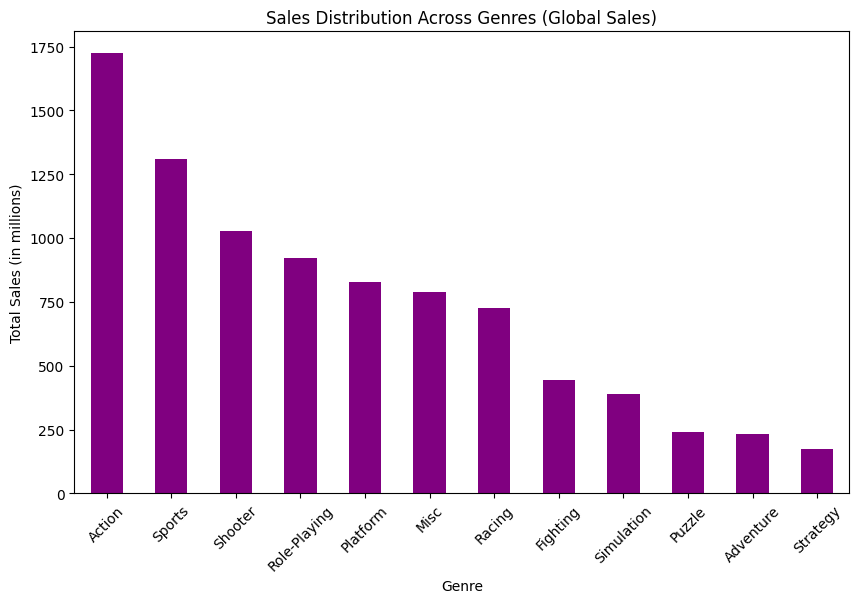

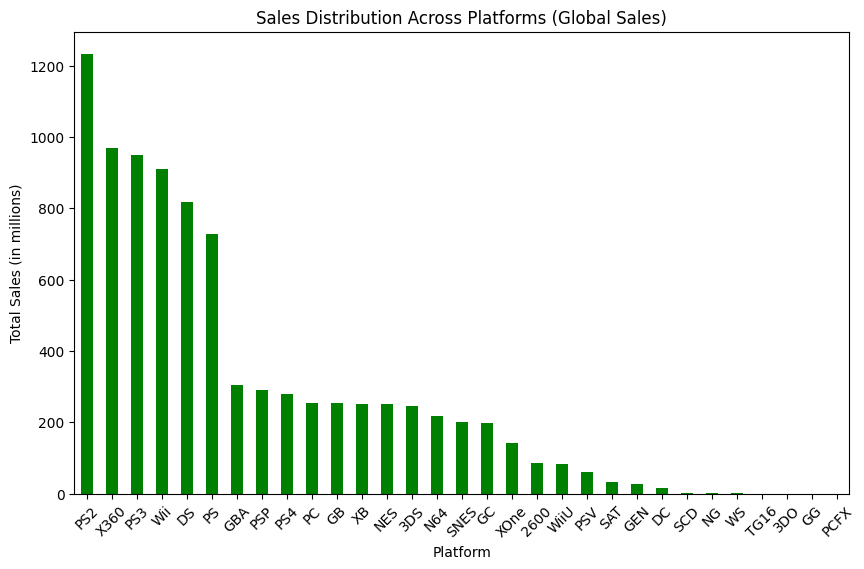

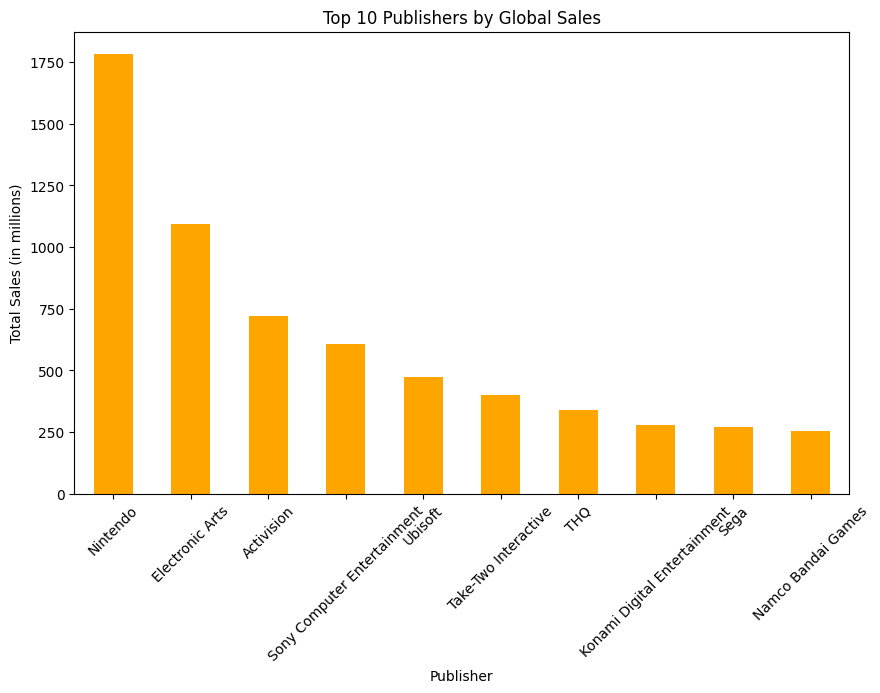

In [17]:
# Summarizing regional, genre, and platform sales, and sales by publisher
regional_sales = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
genre_sales = data.groupby('Genre').sum()['Global_Sales'].sort_values(ascending=False)
platform_sales = data.groupby('Platform').sum()['Global_Sales'].sort_values(ascending=False)
publisher_sales = data.groupby('Publisher').sum()['Global_Sales'].sort_values(ascending=False).head(10)  # Top 10 publishers

# Plotting regional sales
plt.figure(figsize=(10, 6))
regional_sales.plot(kind='bar', color='skyblue')
plt.title('Regional Contributions to Game Sales')
plt.xlabel('Region')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

# Plotting genre sales
plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar', color='purple')
plt.title('Sales Distribution Across Genres (Global Sales)')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

# Plotting platform sales
plt.figure(figsize=(10, 6))
platform_sales.plot(kind='bar', color='green')
plt.title('Sales Distribution Across Platforms (Global Sales)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

# Plotting publisher sales
plt.figure(figsize=(10, 6))
publisher_sales.plot(kind='bar', color='orange')
plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45) 
plt.show()


__Regional Contributions to Game Sales:__

North America is the largest contributor to game sales, followed by Europe, Japan, and other regions. North America plays a significant role in overall global sales 

__Sales Distribution Across Genres:__

Genres like Action, Sports, and Shooter lead in global sales suggesting games in these categories are more popular

__Sales Distribution Across Platforms:__

Some clear frontrunners. Although this may not tell us to much as these are some older generation equipment, it still shows are preference to certain console makers and types

__Sales distribution across publishers:__


# Mapping platform to the creator of the platform
In order to combat the use of a "PS2" game, or other older generation console, creating a greater prediction weight

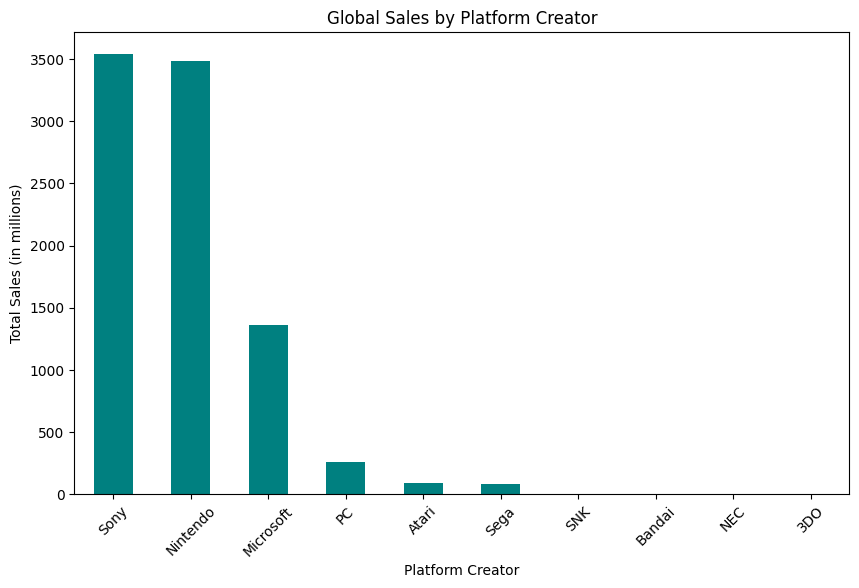

In [15]:
# Mapping of platforms to their respective creators
platform_to_creator = {
    'PS': 'Sony', 'PS2': 'Sony', 'PS3': 'Sony', 'PS4': 'Sony', 'PSP': 'Sony', 'PSV': 'Sony', 
    'X360': 'Microsoft', 'XB': 'Microsoft', 'XOne': 'Microsoft',  
    'Wii': 'Nintendo', 'WiiU': 'Nintendo', 'GB': 'Nintendo', 'GBA': 'Nintendo', 'GC': 'Nintendo', '3DS': 'Nintendo', 'DS': 'Nintendo', 'NES': 'Nintendo', 'SNES': 'Nintendo', 'N64': 'Nintendo', 'Switch': 'Nintendo', 
    'PC': 'PC',
    'GEN': 'Sega', 'DC': 'Sega', 'SAT': 'Sega', 'SCD': 'Sega', 'GG': 'Sega',
    '2600': 'Atari',  
    'WS': 'Bandai',
    'NG': 'SNK',
    'TG16': 'NEC', 'PCFX': 'NEC',
    '3DO': '3DO',
}

# Applying the mapping to the 'Platform' column
data['Platform_Creator'] = data['Platform'].map(platform_to_creator)

creator_sales = data.groupby('Platform_Creator').sum()['Global_Sales'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
creator_sales.plot(kind='bar', color='teal')
plt.title('Global Sales by Platform Creator')
plt.xlabel('Platform Creator')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.show()


### Save to new preprocessing file

In [16]:
data.to_csv('../Data/preprocessed_vgsales.csv', index=False)